In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salaryes = pd.read_csv('Salary-Data.csv')
salaryes

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000
369,43,Male,Master's,Director of Operations,19.0,170000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000


Допустим хотим зарплату(Salary) в зависимости от стажа(Years of Experience)

Удалим все ненужные строки

In [21]:
salaryes = salaryes.drop(columns=['Age', 'Gender', 'Education Level', 'Job Title'])

In [22]:
sortSalary = salaryes.sort_values(by=["Years of Experience", "Salary"])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sortSalary['Years of Experience'], sortSalary['Salary'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

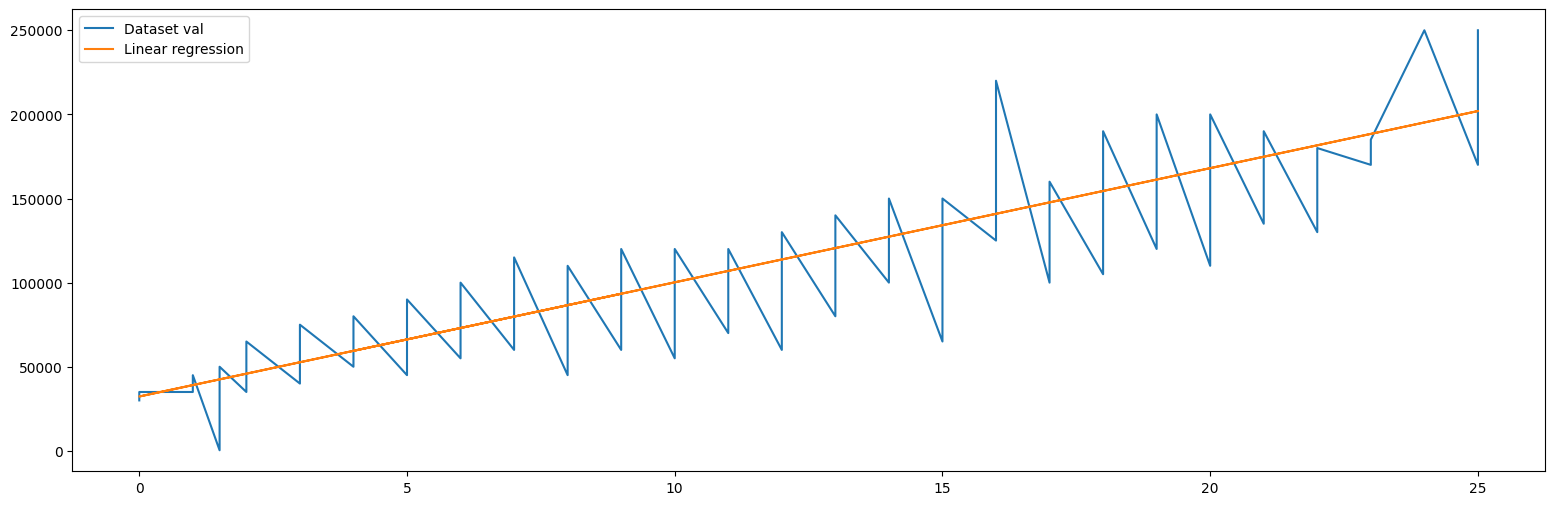

In [24]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortSalary['Years of Experience'], sortSalary['Salary'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.legend()
plt.show()

Посчитаем метрику MAE

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 11854.875271801238
MSE = 263069914.52519003


In [ ]:
Ошибки такие большие т.к датасет достаточно неравномерный(зарплаты берутся по разным профессиям) и разница между ними большая...

In [26]:
from catboost import CatBoostRegressor

In [27]:
catModel = CatBoostRegressor(iterations=2500,
                          learning_rate=0.1,
                          depth=6,
                          random_state=740)

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)

0:	learn: 44128.4730200	total: 352us	remaining: 880ms
100:	learn: 16822.4266112	total: 32.2ms	remaining: 765ms
200:	learn: 16770.9622883	total: 62.9ms	remaining: 720ms
300:	learn: 16768.9019765	total: 79.5ms	remaining: 581ms
400:	learn: 16768.3582043	total: 113ms	remaining: 590ms
500:	learn: 16768.2224619	total: 148ms	remaining: 590ms
600:	learn: 16768.1594579	total: 202ms	remaining: 637ms
700:	learn: 16768.1136686	total: 237ms	remaining: 609ms
800:	learn: 16768.0956454	total: 280ms	remaining: 594ms
900:	learn: 16768.0815924	total: 322ms	remaining: 571ms
1000:	learn: 16768.0693059	total: 355ms	remaining: 532ms
1100:	learn: 16768.0644783	total: 404ms	remaining: 513ms
1200:	learn: 16768.0609299	total: 440ms	remaining: 476ms
1300:	learn: 16768.0573341	total: 476ms	remaining: 439ms
1400:	learn: 16768.0550092	total: 502ms	remaining: 394ms
1500:	learn: 16768.0512876	total: 540ms	remaining: 359ms
1600:	learn: 16768.0487703	total: 575ms	remaining: 323ms
1700:	learn: 16768.0458076	total: 622ms	

In [28]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 268713378.8408431


In [29]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 10771.588067652201


In [30]:
import lightgbm as lgb

In [31]:
lightBmModel = lgb.LGBMRegressor(num_leaves=31,
                          learning_rate=0.1, 
                          n_estimators=100, 
                          random_state=42) 
lightBmModel.fit(X_train, y_train, verbose=10)

y_pred = lightBmModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [32]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 272651538.38801104


In [33]:
print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MAE = 10926.631681489196


In [34]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

y_pred = xgbModel.predict(dtest)

mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 227233244.00233582


In [35]:
print("MAE = %s" % mean_absolute_error(y_pred, y_test))

MAE = 10433.074322916667


Лучший результат показал xgboost. Далее CatBoost и потом lightgbm.